<h1> Module 8 Submission </h1>
<h2> Machine Learning and Data Mining</h2>
<h3 style="margin-top: 10px;" > Stephen Eades </h3>

<p> 7/20/2020 </p>

<h4> Linear Regression and Vectorization </h4>

<p>In this module, you will write one Python notebook to create required outputs.
    <br>
    <br>

<ol>
    <li>Watch the lecture videos and fully understand the lecture notebook</li>
    <li>Copy code from the template to your assignment</li>
    <li>Fill out the missing code. </li>
    <li>Execute your code and print out the output to the notebook
    </li>
    <br>
</ol>

<strong>Submission:</strong> You will export your notebook to both .html and .py formats. You will submit the following file to Blackboard. In your html file, you should include only required outputs of your python script without error messages.

<ol>
    <li> Firstname_Lastname_linear_model.zip (zip the .html and .ipynb files) </li>
</ol>

<strong>Attachments:</strong> 

<ol>
    <li>
    Linear_regression_lecture_v2   :                               The lecture notebook</li>
    <li>
Linear_regression_assignment_template.ipynb:          The assignment template
    </li>
</ol>

In [1]:
# Import packages
import numpy as np 
import time
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# years as "x" and salary as "y" with linear relationship
years = np.arange(0,40,0.5)
np.random.seed(0)
salary = 45000+np.sqrt(years)*16789 +np.random.normal(2000,10000,len(years))

In [3]:
y=np.array(salary)

# Convert X to a nX2 matrix, n is the number samples, and the first column of X is 1
X = np.array(years)

# Create a ones vector
ones = np.ones((X.shape[0],1))

# Add ones to the first vector/column in X 
X = np.reshape(X, (X.shape[0],1))
X = np.concatenate((ones,X), axis=1)

print(X.shape)
print(X[0:3, :])

(80, 2)
[[1.  0. ]
 [1.  0.5]
 [1.  1. ]]


In [4]:
def error(theta, X, y):
    return y-(np.dot(X, theta))

# Calculate SSE
def vectorized_calculate_SSE(theta):
    return sum(error(theta, X, y)**2)

# Calculate gradient
def vectorized_update_theta(theta, gamma):
    gradient=[0,0]
    gradient[0] = -2*sum(error(theta, X, y))
    gradient[1] = -2*sum(error(theta, X, y))
    
    return  [theta[0]-gamma*gradient[0], theta[1]-gamma*gradient[1]]


def vectorized_adaptive_optimum(theta, gamma, t, precision):
    # Infinite loop if no "return" is executed 
    while True:
        # Decrease gamma in every iteration
        gamma *=t
        
        # Store SSE 
        old_SSE = vectorized_calculate_SSE(theta)
        
        # Update theta for a small number of time
        for i in range(10):
            temp_theta =vectorized_update_theta(theta, gamma) 
        
        # Get the new SSE
        new_SSE = vectorized_calculate_SSE(temp_theta)
        
        # If SSE is thrinking, go to the next iteration and try a smaller gamma
        if new_SSE > old_SSE:  
            continue
        
        # If SEE does converge
        else:
            # Try a large iteration to see if gamma can be found
            for i in range(100000):
                
                # Update theta and calculate new SSE
                theta =vectorized_update_theta(theta, gamma) 
                new_SSE = vectorized_calculate_SSE(theta)
                
                # If the update is within the prcision 
                if abs(old_SSE - new_SSE) < precision:
                    
                    # Print out the result and return to the function call
                    print("found minimum cost: \t", new_SSE)
                    print("the optimum theta: \t", theta)
                    print("the learning rate is: \t", gamma)
                    return theta

In [5]:
# Initiate theta
init_theta=[1,1]

# Start from a large learning rate
gamma = 1

# The decrease rate of gamma 
t=0.9

# The precision for stopping the search. 1 unit is a $1
precision =1

# Print out the time used for computing
start_time = time.time()

# Call the vectorized function
theta = vectorized_adaptive_optimum(init_theta,gamma,t,precision)
print("the calculation takes ", time.time()-start_time, " seconds.")

found minimum cost: 	 158745810715.17834
the optimum theta: 	 [5628.405549652124, 5628.405549652124]
the learning rate is: 	 8.464149782874061e-05
the calculation takes  15.721639633178711  seconds.


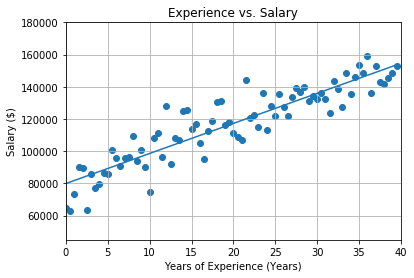

In [6]:
# Plot the prediction line
plt.title("Experience vs. Salary")
plt.xlabel('Years of Experience (Years)')
plt.ylabel('Salary ($)')
plt.grid(True)
plt.xlim(0,40)
plt.ylim(45000,180000)
plt.scatter(years, salary)

# Plot best fit
m,b = np.polyfit(years, salary, 1)
plt.plot(years, m*years + b)

 
plt.show()